<a href="https://colab.research.google.com/github/miemguri/Talentotech2024/blob/main/TallerSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TALLER SQL

INTRODUCCIÓN
Usaré esta notebook para proporcionar una introducción a SQL, lenguaje imprescindible para todo analista de datos.

Los sistemas gestores de bases de datos interpretan consultas escritas en lenguaje SQL, y así es como interactuamos y obtenemos datos de las bases de datos y aplicaciones.

SQL significa Structured Query Language (Lenguaje de consulta estructurado)
SQL permite acceder y manipular bases de datos
SQL es una herramienta simple para el análisis avanzado de datos
SQL no se usa sólo para manipular datos, sino también para administrar la misma base de datos, crear y modificar el diseño de objetos de la base de datos, como tablas. El elemento de SQL que se usa para crear y modificar objetos de base de datos se denomina lenguaje de definición de datos (DDL). Este curso no trata DDL.

En esta notebook veremos cómo trabajar/manipular tablas. Aprenderemos a usar SQL para interactuar con una base de datos de fútbol europeo y generar información interesante con sus datos.

La base de datos utilizada se encuentra en https://www.kaggle.com/datasets/hugomathien/soccer/data

1.1 Definiciones importantes
Aunque SQL es un estándar ANSI/ISO, existen diferentes versiones del lenguaje SQL. Sin embargo, para cumplir con el estándar del American National Standards Institute (ANSI), todas las versiones deben soportar al menos los comandos principales (como SELECT, UPDATE, DELETE, INSERT, WHERE) de forma similar.

En este caso, vamos a trabajar con SQLite que es una implementación específica. La mayoría de los lenguajes SQL comparten todas las capacidades de este notebook. Las diferencias suelen estar en el rendimiento y en las funcionalidades analíticas avanzadas (y a veces en los errores, por supuesto).

1.2 ¿Qué es SQLite?
SQLite es una biblioteca de software que proporciona un sistema de gestión de bases de datos relacionales que se puede utilizar en casi todos los lenguajes de programación, incluido Python.

El lite en SQLite significa facilidad en términos de configuración, administración de la base de datos y recursos necesarios. Las siguientes son sus características más importantes: es autónomo, sin servidor y transaccional.

Más información acerca de SQLite: https://www.sqlitetutorial.net/

1.2.1 Configuraciones previas
SQLite se puede utilizar en casi todos los lenguajes de programación, incluido Python. Esta notebook corre en Python, por lo que vamos a importar la librería de SQLite y otras que nos pueden ser de utilidad más adelante.

Asimismo, crearemos la conexión con la BD y listaremos las tablas con las que contamos.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo



#Taller SQL
En este taller  vamos a analizar UnicodeError dataset  de la liga europea de futbol

In [56]:
# Importacion de librerías
import pandas as pd
import sqlite3 # SQLite

In [57]:
#lectura
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Los datos de entrada están disponibles en el directorio "Drive".
path = '/content/drive/MyDrive/Colab Notebooks/data/db/'
database = path + 'database.sqlite'

In [59]:
# Creamos la conexión con la BD
conn = sqlite3.connect(database)
print ("Conexión exitosa")

Conexión exitosa


In [61]:
print(database)

/content/drive/MyDrive/Colab Notebooks/data/db/database.sqlite


2. Sentencia SELECT
Esta es la consulta más básica y su estructura es muy simple:

Se define lo que se quiere ver después del SELECT
Se eligen las tablas a consultar después del FROM
Las únicas partes imprescindibles de una consulta son el SELECT y el FROM.

La sintaxis de esta consulta es así:

SELECT column1, column2, ...

FROM table_name;

Para consultar por todos los campos en una tabla sin tener que escribir uno por uno el nombre de cada campo, se utiliza SELECT *

SELECT * significa que quieres obtener todas las columnas posibles de la tabla consultada. Los datos devueltos se almacenan en una tabla de resultados, denominada conjunto de resultados.

La sintaxis de esta consulta es así:

SELECT *

FROM table_name;

Es una buena práctica terminar la consulta con un punto y coma para indicar que la consulta está completa. Las palabras clave se escriben en mayúsculas y los nombres de tablas y campos se escriben en minúsculas.

In [136]:
#listaremos las tablas con las que contamos:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [69]:
#Listar todos los partidos
query = """SELECT *
            FROM Match; """
matchs = pd.read_sql(query, conn)
matchs

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2.1.1 Ejemplo: Listar los países

Queremos consultar qué países se encuentran en la tabla Country de la base de datos del fútbol europeo.

Importante: La estructura y el orden de las secciones son importantes, mientras que los espacios, las nuevas líneas, las mayúsculas y las sangrías están ahí para facilitar la lectura del código.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [116]:
#Listar los paises: Queremos consultar qué países se encuentran en la tabla Country de la base de datos del fútbol europeo.
query = """SELECT *
            FROM Country; """
countries = pd.read_sql(query, conn)
countries
#11 paises se encuentran en la tabla country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


2.1.2 Práctica: Listar las ligas del fútbol europeo

Deben listar todas las ligas que estén en la tabla League de la base de datos de fútbol europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" justo después de la palabra query =

Una vez que estén lo tengan listo, ejecuten haciendo clic en ejecutar (o Shift+Enter) el códido de abajo

In [119]:
#Consultar todas las ligas del fútbol europeo.

query = """SELECT *
            FROM league; """

leagues = pd.read_sql(query, conn)
leagues
#Son 11 ligas de futbol

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


2.1.3 Práctica: Listar los jugadores del fútbol europeo

Deben listar los campos id,player_name, birthday, height y weight que estan en la tabla Player de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [124]:
query = """ SELECT id, player_name, birthday, height, weight
            FROM player;
            """
players = pd.read_sql(query,conn)
players
# Se observa el id, nombre, fecha de nacimiento, altura y peso de 11.059 jugadores,
#incluyendo los nombres que no tienen un apellido

,id,player_name,birthday,height,weight
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,3,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...
11055,11071,Zoumana Camara,1979-04-03 00:00:00,182.88,168
11056,11072,Zsolt Laczko,1986-12-18 00:00:00,182.88,176
11057,11073,Zsolt Low,1979-04-29 00:00:00,180.34,154
11058,11074,Zurab Khizanishvili,1981-10-06 00:00:00,185.42,172


In [125]:
#Listar jugadores del fútbol europeo
query = """ SELECT DISTINCT player_name
              FROM player; """
players = pd.read_sql(query, conn)
players
#Son 10.848 nombres de los jugadores con valores unicos en la tabla player.

,player_name
0,Aaron Appindangoye
1,Aaron Cresswell
2,Aaron Doran
3,Aaron Galindo
4,Aaron Hughes
...,...
10843,Zoumana Camara
10844,Zsolt Laczko
10845,Zsolt Low
10846,Zurab Khizanishvili


2.2 Sentencia SELECT DISTINCT
La sentencia SELECT DISTINCT se utiliza para devolver sólo valores distintos (diferentes).

Dentro de una tabla, una columna a menudo contiene muchos valores duplicados y a veces sólo se desea listar los diferentes valores (distintos).

La sintaxis de SELECT DISTINCT es así:    
SELECT DISTINCT column1  
FROM table_name;



2.2.1 Ejemplo: Listar las temporadas jugadas de esta Base de Datos

Si consultamos por todas las temporadas que se almacenaron en la tabla Matchde la base de datos de Fútbol Europeo, vamos a tener el siguiente resultado.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

Con el resultado anterior, es muy difícil responder a la pregunta ¿Cuáles son las temporadas almacenadas en esta base de datos? Para responderla sin mucho esfuerzo, usamos SELECT DISTINCT para consultar la tabla Match de la base de datos.

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [137]:
query = """ SELECT DISTINCT season
            FROM Match; """
seasons = pd.read_sql(query, conn)
seasons
#las distintas temporadas son 8 comprendidas entre los años 2008 y 2016

,season
0,2008/2009
1,2009/2010
2,2010/2011
3,2011/2012
4,2012/2013
5,2013/2014
6,2014/2015
7,2015/2016


In [134]:
 # CONTAR temporadas de los partidos
query = """ SELECT COUNT(season)
            FROM Match; """
seasons = pd.read_sql(query, conn)
seasons
# En total son 25.979 temporadas de juego

,COUNT(season)
0,25979


In [138]:
 # Listar temporadas de los partidos
query = """ SELECT season
            FROM Match; """
seasons = pd.read_sql(query, conn)
seasons

,season
0,2008/2009
1,2008/2009
2,2008/2009
3,2008/2009
4,2008/2009
...,...
25974,2015/2016
25975,2015/2016
25976,2015/2016
25977,2015/2016


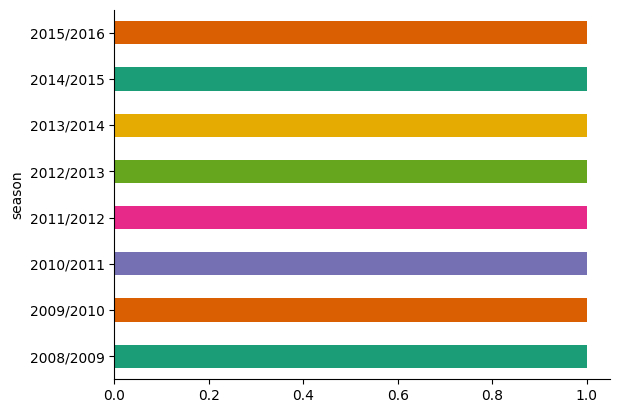

In [127]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

2.2.2 Práctica:

Listar sólo tasas diferentes de valoración general de los jugadores.

En la tabla Player_Attributes de la base de datos de Fútbol Europeo hay el campo overall_rating que parece contener la valoración de los jugadores. El objetivo es ver sólo tasas diferentes de valoración general de los jugadores.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [91]:
query = """ SELECT DISTINCT overall_rating
FROM player_attributes; """
overall_rating = pd.read_sql(query,conn)
overall_rating
# Tasas diferentes de valoración general de los jugadores

,overall_rating
0,67.0
1,62.0
2,61.0
3,74.0
4,73.0
...,...
57,33.0
58,36.0
59,37.0
60,35.0


In [112]:
# Campo overall_rating contiene la valoración de la totalidad de jugadores
query = """ SELECT id, overall_rating
FROM player_attributes; """
overall_rating = pd.read_sql(query,conn)
overall_rating
# se observa la valoracion de todos los jugadores por id y clasificacion

,id,overall_rating
0,1,67.0
1,2,67.0
2,3,62.0
3,4,61.0
4,5,61.0
...,...,...
183973,183974,83.0
183974,183975,78.0
183975,183976,77.0
183976,183977,78.0


In [ ]:
# Campo overall_rating contiene la valoración de los jugadores
query = """ SELECT id, overall_rating
FROM player_attributes; """
overall_rating = pd.read_sql(query,conn)
overall_rating
# se observa la valoracion de todos los jugadores por id y clasificacion

3. Sentencia LIMIT
Cuando deseamos poner un límite al resultado o no nos interesa conocer la totalidad de los resultados, podemos limitar la cantidad de registros resultantes mediante la sentencia LIMIT

La sintaxis de LIMIT es así:

SELECT column1, column2...

FROM table_name

LIMIT number;

3.1.1 Ejemplo:

Listar 15 jugadores de la base de datos del fútbol europeo¶

Queremos listar 15 jugadores de la tabla Player de la base de datos de Fútbol Europeo. En la tabla de resultados quiero ver los campos ìd,player_name, birthday, height y weight. Todos se encuentran en la tabla Player

Ejecuta (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [ ]:
query = """ SELECT id, player_name, birthday, height, weight
            FROM player
            LIMIT 15; """
players = pd.read_sql(query,conn)
players
# Se puede observar el id, nombre,fecha de nacimiento, altura y peso de 15 jugadores.

,id,player_name,birthday,height,weight
0,1,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
2,3,Aaron Doran,1991-05-13 00:00:00,170.18,163
3,4,Aaron Galindo,1982-05-08 00:00:00,182.88,198
4,5,Aaron Hughes,1979-11-08 00:00:00,182.88,154
5,6,Aaron Hunt,1986-09-04 00:00:00,182.88,161
6,7,Aaron Kuhl,1996-01-30 00:00:00,172.72,146
7,8,Aaron Lennon,1987-04-16 00:00:00,165.10,139
8,9,Aaron Lennox,1993-02-19 00:00:00,190.50,181
9,10,Aaron Meijers,1987-10-28 00:00:00,175.26,170


3.1.2 Práctica:

Deben listar 25 equipos del fútbol europeo. La tabla de resultados deberá contener los campos id y team_long_name de la tabla Team de la base de datos de Fútbol Europeo.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [108]:
# SELECT column1, column2, ...FROM table_name;
query = """ SELECT id, team_long_name
            FROM team LIMIT 25; """

teams = pd.read_sql(query, conn)
teams
# Se observa el id y nombre de 25 equipos de futbol

,id,team_long_name
0,1,KRC Genk
1,2,Beerschot AC
2,3,SV Zulte-Waregem
3,4,Sporting Lokeren
4,5,KSV Cercle Brugge
5,6,RSC Anderlecht
6,7,KAA Gent
7,8,RAEC Mons
8,9,FCV Dender EH
9,10,Standard de Liège


In [140]:
# SELECT column1, column2, ...FROM table_name;
query = """ SELECT *
            FROM team; """
teams = pd.read_sql(query, conn)
teams
# Muestra el nombre de todos 298 equipos

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


4. Funciones agregativas/ Métricas

Todas las métricas tienen que ser agregadas usando funciones. Las funciones agregativas más comunes son:

SUM()| Sumatoria total de una columna tipo numérica.

COUNT()| Devuelve la cantidad de filas.

COUNT(DISTINCT)| Devuelve la cantidad de filas distintas o diferentes.

AVG() | Promedia los valores de una columna tipo numérica.

MIN() | Menor valor dentro de la columna especificada.

MAX() | Mayor valor dentro de la columna especificada.

La sintaxis de las métricas en la sentencia SELECT es así:

SUM()

SELECT SUM(column1), column2...
FROM table_name

COUNT()

SELECT COUNT(column1), column2...
FROM table_name

COUNT(DISTINCT)

SELECT COUNT(DISTINCT column1), column2...
FROM table_name

AVG()

SELECT AVG(column1), column2...

FROM table_name

MIN()

SELECT MIN(column1), column2...

FROM table_name

MAX()

SELECT MAX(column1), column2...

FROM table_name

4.1.1 Ejemplo:

¿Cuántos países diferentes están almacenados en la tabla Country?
Para consultar por el número de países diferentes almacenados en la tabla Country y que la tabla de resultados nos muestre únicamente el número con la cantidad de países, necesitamos usar una función agregativa que cuente el número de registros pero además, que cuente sólo los registros distintos. Esa función es COUNT(DISTINCT )

Ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [147]:
query = """ SELECT COUNT(DISTINCT name)
            FROM country; """
countries = pd.read_sql(query, conn)
countries

,COUNT(DISTINCT name)
0,11


4.1.2 Práctica:


Deben traer el número de etapas stage almacenados en la tabla Match de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con la cantidad de etapas diferentes.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [174]:
#Traer el número de etapas jugadas de la tabla Match
query = """ SELECT COUNT(DISTINCT stage) AS conteo_temporadas
        FROM match; """
stages = pd.read_sql(query, conn)
stages
# En todas las ligas europeas em el periodo de tiempo entre 2008 al 2016 se jugaron 38 temporadas

,conteo_temporadas
0,38


4.1.3 Práctica:

Traer la suma de goles hechos por los equipos visitantes de la tabla Match

Deben traer la suma de goles hechos por los equipos visitantes away_team_goal almacenados en la tabla Match de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con la suma de goles.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo

In [161]:
query = """SELECT SUM(away_team_goal)
            FROM match; """
sum_awayteam = pd.read_sql(query, conn)
sum_awayteam
#Los equipos visitantes hicieron un total de 30.160 goles

,SUM(away_team_goal)
0,30160


Ejercicios personales otras funciones:


In [76]:
#Mostrar las temporadas(seasons) 2015- 2016
query = """ SELECT * FROM Match
            WHERE stage = 1 AND SEASON ='2015/2016'; """
Matchs = pd.read_sql(query,conn)
Matchs

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1489,1,1,2015/2016,1,2015-07-24 00:00:00,1979832,9997,8342,2,...,None,4.4,4.0,1.75,None,None,None,None,None,None
1,1490,1,1,2015/2016,1,2015-07-25 00:00:00,1979833,8571,9985,2,...,None,2.7,3.4,2.63,None,None,None,None,None,None
2,1491,1,1,2015/2016,1,2015-07-25 00:00:00,1979834,9987,1773,3,...,None,1.6,4.1,5.50,None,None,None,None,None,None
3,1492,1,1,2015/2016,1,2015-07-25 00:00:00,1979835,8573,8203,3,...,None,2.5,3.3,2.88,None,None,None,None,None,None
4,1493,1,1,2015/2016,1,2015-07-25 00:00:00,1979836,10000,9994,3,...,None,2.3,3.4,3.10,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,25800,24558,24558,2015/2016,1,2015-07-18 00:00:00,1992052,10199,10179,2,...,None,NaN,NaN,NaN,None,None,None,None,None,None
90,25801,24558,24558,2015/2016,1,2015-07-19 00:00:00,1992053,9931,9824,2,...,None,NaN,NaN,NaN,None,None,None,None,None,None
91,25802,24558,24558,2015/2016,1,2015-07-19 00:00:00,1992054,10191,9956,3,...,None,NaN,NaN,NaN,None,None,None,None,None,None
92,25803,24558,24558,2015/2016,1,2015-07-19 00:00:00,1992055,10190,7896,2,...,None,NaN,NaN,NaN,None,None,None,None,None,None


In [77]:
#Mostrar temporadas diferentes a 2015 y 2016
query = """ SELECT * FROM Match
            WHERE NOT season ='2015/2016'; """
Matchs = pd.read_sql(query,conn)
Matchs

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22648,25795,24558,24558,2014/2015,9,2014-09-23 00:00:00,1717254,9931,9824,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22649,25796,24558,24558,2014/2015,9,2014-09-23 00:00:00,1717255,10191,10199,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22650,25797,24558,24558,2014/2015,9,2014-09-24 00:00:00,1717256,10190,9956,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22651,25798,24558,24558,2014/2015,9,2014-09-24 00:00:00,1717257,10243,9930,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
query = """ SELECT AVG (height) AS altura, AVG (height)
             FROM player; """
jugadores= pd.read_sql(query,conn)
jugadores


,altura,AVG (height)
0,181.867445,181.867445


4.1.4 Práctica:

Traer el promedio de goles hechos por los equipos locales y el promedio de goles hechos por los visitantes de la tabla Match

Deben traer el promedio de goles hechos por los equipos locales home_team_goal y el promedio de goles hechos por los equipos visitantes away_team_goal almacenados en la tabla Match de la base de datos de Fútbol Europeo. La tabla de resultados deberá mostrar únicamente el número con el promedio de goles.

Para ello deberán escribir la consulta SQL entre un par de 3 comillas dobles: """consulta SQL""" después de la palabra query =

Una vez que estén lo tengan listo, ejecuten (haciendo clic en ejecutar o Shift+Enter) el códido de abajo



In [173]:
query = """SELECT AVG(home_team_goal), away_team_goal
            FROM match; """
avg_teamgoals = pd.read_sql(query, conn)
avg_teamgoals

,AVG(home_team_goal),away_team_goal
0,1.544594,1
